In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import copy

In [4]:
def Hap(v, t, O, k1, k2, k3, k4, k5, k6):
  v0 = -k1*v[0]*O + k2*v[1]
  v1 = k1*v[0]*O - k2*v[1] - k3*v[2]*v[1] + k4*v[3] - k5*v[3]*v[1] + k6*v[4]
  v2 = -k3*v[2]*v[1] + k4*v[3]
  v3 = k3*v[2]*v[1] - k4*v[3] - k5*v[3]*v[1] + k6*v[4]
  v4 = k5*v[3]*v[1] - k6*v[4]
  return [v0,v1,v2,v3,v4]

In [5]:
def fitness(O,fp,data):
    v0=[fp[6],0.0,fp[7],0.0,0.0] 
    t=np.arange(0,120,0.01)
    v=odeint(Hap,v0,t,args=(O,fp[0],fp[1],fp[2],fp[3],fp[4],fp[5]))
    transcript = np.array([x/(x+fp[8]) for x in v[:,4]])
    RSS=np.sum([(transcript[np.where(t==data['t'][id])[0]] - data['rtl'][id])**2 for id in range(len(data))])
    return(1/RSS)
    
def fitness_for_population(O,population,data):
    return [fitness(O,population[i],data) for i in range(len(population))]

In [6]:
#define selection
def select(O, population, fitness_list):
    selected_population = [population[fitness_list.index(max(fitness_list))]] #elite selection
    fitness_sum = sum(fitness_list)
    for i in range(len(population)-1):
        roulette = fitness_sum*random.random()
        id = 0
        while roulette > 0:
            roulette = roulette - fitness_list[id]
            id = id + 1
        selected_population.append(population[id-1])
    return selected_population

#define cross
def cross(first, second):
    p=int(len(first)*random.random())
    new_one = first[:p+1]+second[p+1:]
    new_two = second[:p+1]+first[p+1:]
    return [new_one,new_two]

#define mutation
def mutate(old):
    new = copy.copy(old)
    new[random.randint(0,len(new)-1)]=random.random()
    return new

In [7]:
#read data for fitting
data = pd.read_csv('Fig3A_1min_step.csv',names=('t','rtl'))
data['t'] = data['t'].round(2)
print(data)

         t       rtl
0      0.0  0.077469
1      1.0  0.076396
2      2.0  0.076396
3      3.0  0.079615
4      4.0  0.087126
..     ...       ...
115  115.0  0.547425
116  116.0  0.548498
117  117.0  0.549571
118  118.0  0.549571
119  119.0  0.549571

[120 rows x 2 columns]


In [7]:
#define initial population

#DO NOT EXECUTE THIS UNLESS YOU WANT TO CONFIRM GA: This cell consume a lot of time.
N=1000
population = [[random.random() for i in range(9)] for j in range(N)]

generation = 100
O=200

for gen in range(generation):
    print(gen)
    fitness_list = fitness_for_population(O,population,data)
    selected_population = select(O,population,fitness_list)
    cnt = 1
    next_population = [selected_population[0]]
    while cnt < N*0.95/2:
        next_population = next_population + cross(population[cnt], population[cnt+1])
        cnt = cnt + 2
    while cnt < N:
        next_population.append(mutate(selected_population[cnt]))
        cnt = cnt + 1
    next_population,population = population,next_population
    
print(select(O,population,fitness_for_population(O,population,data))[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[0.9955032249707431, 0.03216701347549755, 0.16746667657269187, 0.2768951557587751, 0.1774701733114541, 0.0044596505061225145, 0.6294790858484255, 0.4041695418619293, 0.16870296177776967]


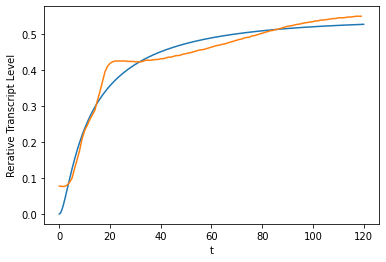

In [9]:
#fp = select(O,population,fitness_for_population(O,population,data))[0]
fp = [0.9955032249707431, 0.03216701347549755, 0.16746667657269187, 0.2768951557587751, 0.1774701733114541, 0.0044596505061225145, 0.6294790858484255, 0.4041695418619293, 0.16870296177776967]

v0=[fp[6],0.0,fp[7],0.0,0.0] 
t=np.arange(0,120,0.01)
O=200

v=odeint(Hap,v0,t,args=(O,fp[0],fp[1],fp[2],fp[3],fp[4],fp[5]))
transcript = np.array([x/(x+fp[8]) for x in v[:,4]])
plt.plot(t,transcript)
plt.plot(data['t'],data['rtl'])
plt.xlabel("t")
plt.ylabel("Rerative Transcript Level")
plt.show()

In [10]:
data2 = pd.read_csv('Fig2A_1step.csv',names=('O2','rtl'))
data2['O2'] = data2['O2'].round(2)
print(data2)

      O2       rtl
0      0  0.319650
1      1  0.544461
2      2  0.568125
3      3  0.583902
4      4  0.601650
..   ...       ...
195  195  0.978308
196  196  0.982252
197  197  0.986196
198  198  0.990140
199  199  0.996056

[200 rows x 2 columns]


In [12]:
ans=[]
v0=[fp[6],0.0,fp[7],0.0,0.0] 
t=np.arange(0,120,0.01)

Os=np.arange(0,200,0.01)
for O in Os:
  v=odeint(Hap,v0,t,args=(O,fp[0],fp[1],fp[2],fp[3],fp[4],fp[5]))
  ans.append(v[-1,4]/(v[-1,4]+fp[8]))


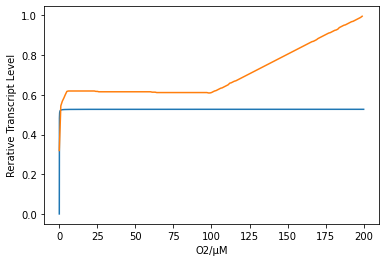

In [14]:
plt.plot(Os,ans)
plt.plot(data2['O2'],data2['rtl'])

plt.xlabel("O2/μM")
plt.ylabel("Rerative Transcript Level")

plt.show()

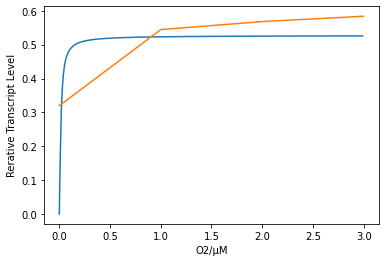

In [16]:
plt.plot(Os[0:300],ans[0:300])
plt.plot(data2['O2'][0:4],data2['rtl'][0:4])

plt.xlabel("O2/μM")
plt.ylabel("Rerative Transcript Level")

plt.show()

In [18]:
data3 = pd.read_csv('Fig2A_0.25step.csv',names=('O2','rtl'))
data3['O2'] = data3['O2'].round(2)
print(data3)

     O2       rtl
0  0.00  0.322124
1  0.25  0.399966
2  0.50  0.478507
3  0.75  0.512869
4  1.00  0.547230


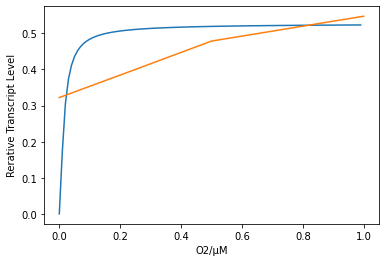

In [22]:
plt.plot(Os[0:100],ans[0:100])
plt.plot(data3['O2'],data3['rtl'])

plt.xlabel("O2/μM")
plt.ylabel("Rerative Transcript Level")

plt.show()